<a href="https://colab.research.google.com/github/AdnanAraf/Ai-univers/blob/main/Android_Malware_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/'
plots_path = folder_path + 'Plots/'
dataset_path = folder_path + 'dataset/'
dataset_file = dataset_path + 'Android_Permission.csv'
unsampled = 'Unsampled'
oversampled = 'Oversampled'
undersampled = 'Undersampled'

In [5]:
np.random.seed(0)

In [6]:
df = pd.read_csv(dataset_file, sep=',')
df

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,smartstay.beechwood,Travel & Local,"Beechwood is an Android hotel app for guests, ...",5.0,2,0.00,"{com.bluewaterpages, com.travelconnection.luxu...",3.0,1,...,0,0,0,0,0,0,0,0,0,1
29995,ZDefense: Tower Defense,mobi.zstudio.avi.full,Arcade & Action,Explosive Tower Defense!<p>Top Tower Defense G...,4.6,56,2.99,"{com.entwicklerx.swampdefense, com.digimentgam...",3.0,3,...,0,0,0,0,0,0,0,0,0,1
29996,Super Task Killer FREE,com.netqin.aotkiller,Tools,Get it for FREE. Quickly Kill running apps. Fr...,4.2,6101,0.00,"{com.guardam.TaskKiller, com.netqin.authtoken_...",4.0,3,...,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,VMC.Ambassadorhotel,Travel & Local,Key features of this App: <br>1. View photos o...,3.4,5,0.00,"{com.hyxen.app.NewTaipeiTravel, j2ab.android.t...",3.0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
df.shape

(29999, 184)

In [8]:
df.columns

Index(['App', 'Package', 'Category', 'Description', 'Rating',
       'Number of ratings', 'Price', 'Related apps',
       'Dangerous permissions count', 'Safe permissions count',
       ...
       'Your personal information : read calendar events (D)',
       'Your personal information : read contact data (D)',
       'Your personal information : read sensitive log data (D)',
       'Your personal information : read user defined dictionary (D)',
       'Your personal information : retrieve system internal state (S)',
       'Your personal information : set alarm in alarm clock (S)',
       'Your personal information : write Browser's history and bookmarks (D)',
       'Your personal information : write contact data (D)',
       'Your personal information : write to user defined dictionary (S)',
       'Class'],
      dtype='object', length=184)

In [9]:
df.describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
count,29999.000000,2.999900e+04,29999.000000,29795.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,...,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,3.537215,6.852608e+03,0.625707,3.111160,1.353978,0.000300,0.000700,0.0,0.000400,0.000033,...,0.014667,0.087970,0.023801,0.001333,0.000567,0.000400,0.016567,0.039735,0.001500,0.666689
std,1.424685,4.586899e+04,3.222620,3.052602,1.523491,0.017318,0.026449,0.0,0.019997,0.005774,...,0.120219,0.283255,0.152431,0.036492,0.023799,0.019997,0.127645,0.195338,0.038702,0.471405
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,4.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.600000e+01,0.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.400000,7.160000e+02,0.000000,4.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,1.908590e+06,158.070000,30.000000,16.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [11]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [12]:
def plot_missing_values(null_columns) :
    plt.xlabel("Column Names")
    plt.ylabel("Mising values")
    plt.xticks(rotation = 30, ha = "right")
    name = 'Columns Name vs Missing Values'
    plt.tight_layout()
    plt.title(name)
    ax = sns.barplot(x = list(null_columns.keys()), y = list(null_columns.values()))
    ax.bar_label(ax.containers[0])
    plt.savefig( plots_path + name + ".png", bbox_inches = 'tight')
    plt.show()

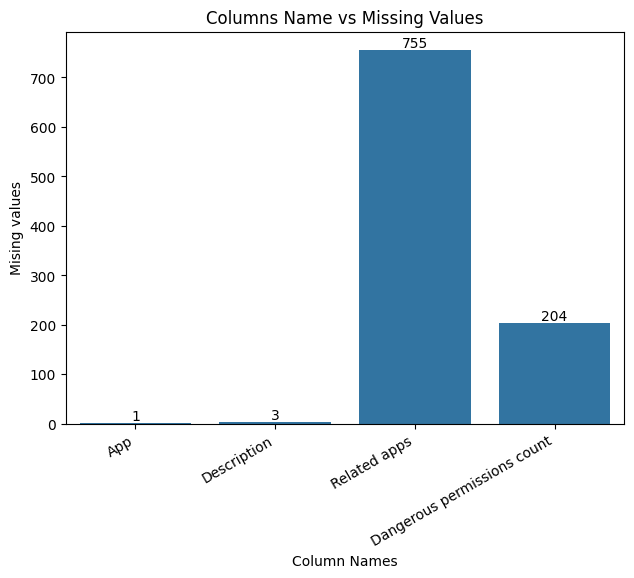

In [13]:
null_sum = dict(df.isna().sum()[df.isna().sum()>0])
plot_missing_values(null_sum)

In [14]:
missing_values_column = df.columns[df.isna().any()]
for c in missing_values_column :
    if df[c].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] :
        df[c].replace(np.nan, np.nanmean(df[c].unique()), inplace=True)

In [15]:
def replace_mean(x):
    if x.dtype!='object':
        return x.fillna(x.mean())
    return x

In [16]:
 new_df=df.apply(lambda x: replace_mean(x),axis=1)
 new_df

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,smartstay.beechwood,Travel & Local,"Beechwood is an Android hotel app for guests, ...",5.0,2,0.00,"{com.bluewaterpages, com.travelconnection.luxu...",3.0,1,...,0,0,0,0,0,0,0,0,0,1
29995,ZDefense: Tower Defense,mobi.zstudio.avi.full,Arcade & Action,Explosive Tower Defense!<p>Top Tower Defense G...,4.6,56,2.99,"{com.entwicklerx.swampdefense, com.digimentgam...",3.0,3,...,0,0,0,0,0,0,0,0,0,1
29996,Super Task Killer FREE,com.netqin.aotkiller,Tools,Get it for FREE. Quickly Kill running apps. Fr...,4.2,6101,0.00,"{com.guardam.TaskKiller, com.netqin.authtoken_...",4.0,3,...,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,VMC.Ambassadorhotel,Travel & Local,Key features of this App: <br>1. View photos o...,3.4,5,0.00,"{com.hyxen.app.NewTaipeiTravel, j2ab.android.t...",3.0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
df_permission = pd.concat([new_df['App'],new_df.iloc[:,10:]],axis=1)
df_permission

,App,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29995,ZDefense: Tower Defense,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,Super Task Killer FREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
def plot_class_distribution(vals, sample_type) :
    _ , data = np.unique(vals, return_counts = True)
    labels = ['Benign','Malware']
    colors = sns.color_palette('bright')[0:5]
    plt.tight_layout()
    plt.pie(data, labels = labels, colors = colors, autopct = lambda p: '{:.2f}%\n({:.0f})'.format(p, (p/100) * data.sum()))
    name = 'Class Distribution'
    plt.title(name + ' - ' + sample_type, color = 'red')
    plt.savefig(plots_path + sample_type + '/' + name + '.png', bbox_inches='tight')
    plt.show()

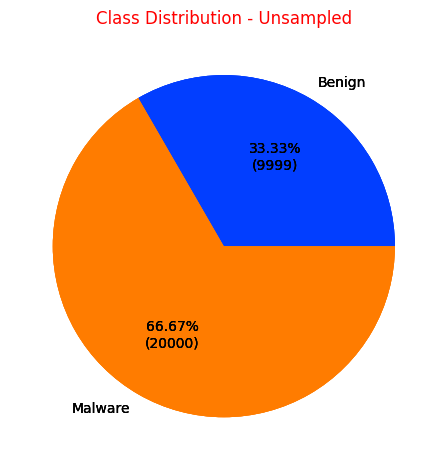

In [ ]:
plot_class_distribution(df_permission['Class'], unsampled)

In [ ]:
df_permission

,App,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29995,ZDefense: Tower Defense,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,Super Task Killer FREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
df_permission.index = df_permission['App']
df_permission.drop('App', inplace = True, axis = 1)
df_permission

,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
App,,,,,,,,,,,,,,,,,,,,,
Canada Post Corporation,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
Word Farm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fortunes of War FREE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Better Keyboard: Avatar Purple,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boxing Day,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beechwood Hotel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ZDefense: Tower Defense,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Super Task Killer FREE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
x = df_permission.iloc[1: , : -1]
y = df_permission.iloc[1: , -1]
np.random.seed(0)

In [21]:
x

,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),...,Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S)
App,,,,,,,,,,,,,,,,,,,,,
Word Farm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fortunes of War FREE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Better Keyboard: Avatar Purple,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boxing Day,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ms Claus Live Wallpaper,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beechwood Hotel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZDefense: Tower Defense,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Super Task Killer FREE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
print(df.isnull().sum())

App                                                                      1
Package                                                                  0
Category                                                                 0
Description                                                              3
Rating                                                                   0
                                                                        ..
Your personal information : set alarm in alarm clock (S)                 0
Your personal information : write Browser's history and bookmarks (D)    0
Your personal information : write contact data (D)                       0
Your personal information : write to user defined dictionary (S)         0
Class                                                                    0
Length: 184, dtype: int64


In [ ]:
x = df_permission.iloc[1: , : -1]
y = df_permission.iloc[1: , -1]
np.random.seed(0)

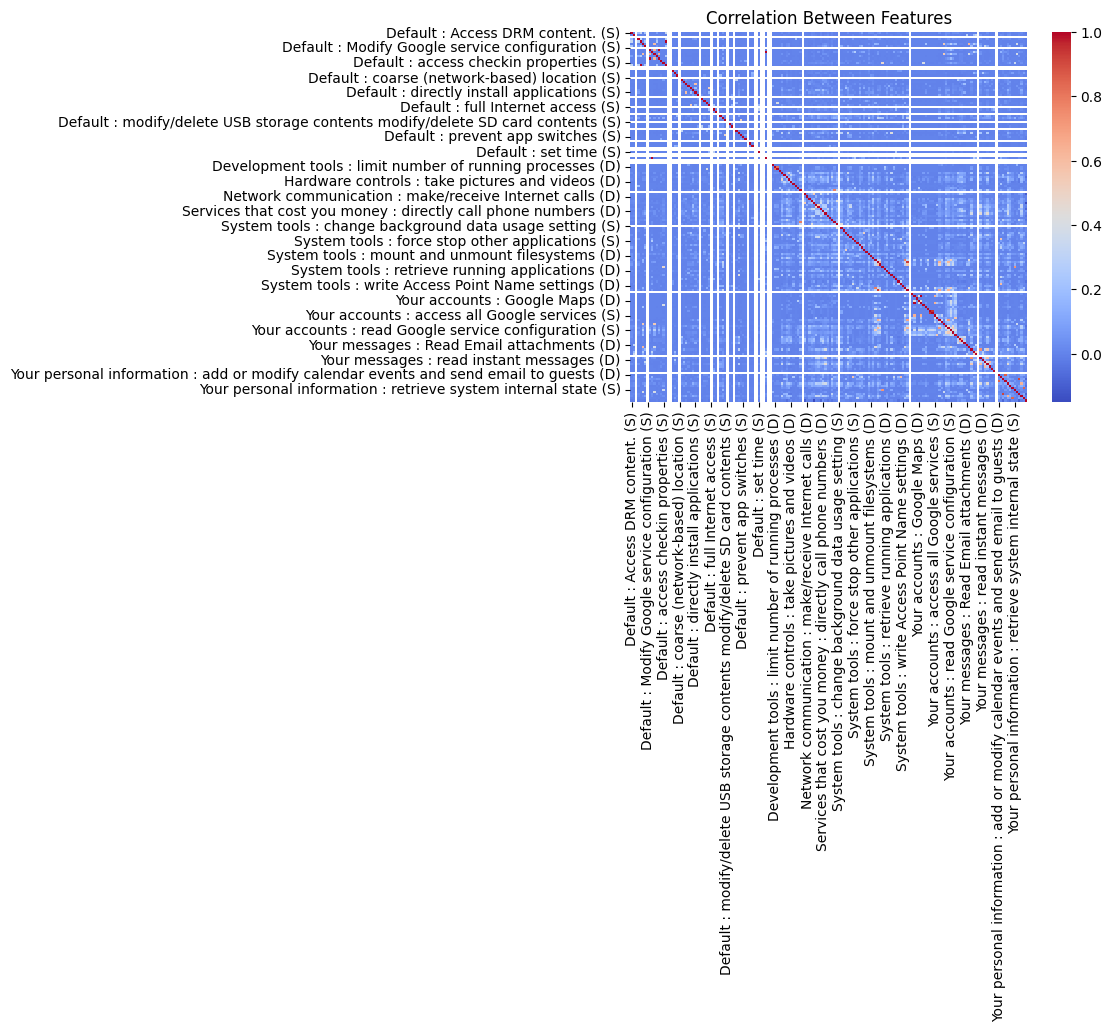

In [24]:
sns.heatmap(df_permission.corr(), cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

In [25]:
data = df

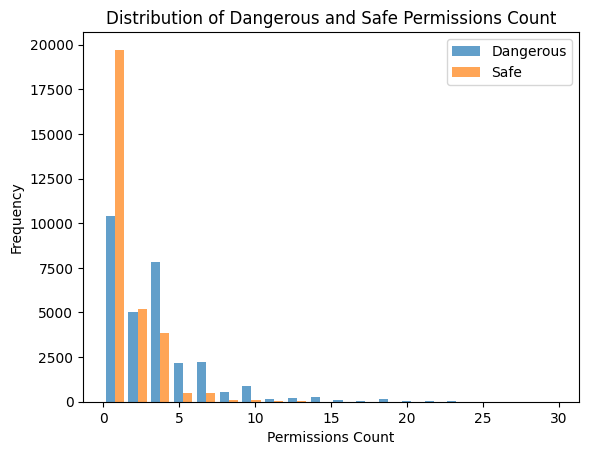

In [26]:
import matplotlib.pyplot as plt

dangerous_permissions = data['Dangerous permissions count']
safe_permissions = data['Safe permissions count']

plt.hist([dangerous_permissions, safe_permissions], label=['Dangerous', 'Safe'], bins=20, alpha=0.7)
plt.title('Distribution of Dangerous and Safe Permissions Count')
plt.xlabel('Permissions Count')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

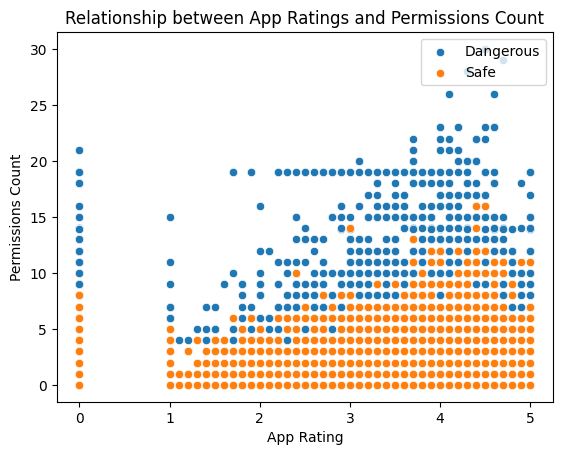

In [27]:
import seaborn as sns

sns.scatterplot(x=data['Rating'], y=data['Dangerous permissions count'], label='Dangerous')
sns.scatterplot(x=data['Rating'], y=data['Safe permissions count'], label='Safe')
plt.title('Relationship between App Ratings and Permissions Count')
plt.xlabel('App Rating')
plt.ylabel('Permissions Count')
plt.legend(loc='upper right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
def logistic(X_train, X_test, y_train, y_test):
    reg=LogisticRegression(max_iter=200,n_jobs=-1).fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

In [ ]:
logistic(X_train, X_test, y_train, y_test)

Training Accuracy 0.69
Test Accuracy 0.68
Recall Score 0.95
ROC Score 0.53


LogisticRegression(max_iter=200, n_jobs=-1)

In [ ]:
def Naive(X_train, X_test, y_train, y_test):
    reg=GaussianNB().fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

In [ ]:
Naive(X_train, X_test, y_train, y_test)

Training Accuracy 0.68
Test Accuracy 0.67
Recall Score 0.97
ROC Score 0.52


GaussianNB()

In [ ]:
from io import StringIO
import pydotplus
from IPython.display import Image

In [ ]:
def visualize_dtree(reg, columns, sample_type, name = 'dt') :
    dot_data = StringIO()
    export_graphviz(reg, out_file = dot_data,
                    filled = True, rounded=True,
                    special_characters = True,feature_names = columns, class_names = ['Benign','Malware'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    Image(graph.create_png())
    graph.write_png(plots_path + sample_type + '/' + name + '.png')

In [ ]:
def dtree(X_train, X_test, y_train, y_test):
    reg=DecisionTreeClassifier(max_features='auto',max_depth=10,max_leaf_nodes=10).fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

**Sampling**

In [ ]:
reg = dtree(X_train, X_test, y_train, y_test)
visualize_dtree(reg, df_permission.columns[:-1], unsampled)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Training Accuracy 0.67
Test Accuracy 0.67
Recall Score 1.00
ROC Score 0.50


In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
oversample = RandomOverSampler(sampling_strategy=0.9)
X_over, y_over = oversample.fit_resample(x, y)
X_over, y_over

(       Default : Access DRM content. (S)  \
 0                                      0   
 1                                      0   
 2                                      0   
 3                                      0   
 4                                      0   
 ...                                  ...   
 37995                                  0   
 37996                                  0   
 37997                                  0   
 37998                                  0   
 37999                                  0   
 
        Default : Access Email provider data (S)  \
 0                                             0   
 1                                             0   
 2                                             0   
 3                                             0   
 4                                             0   
 ...                                         ...   
 37995                                         0   
 37996                                    

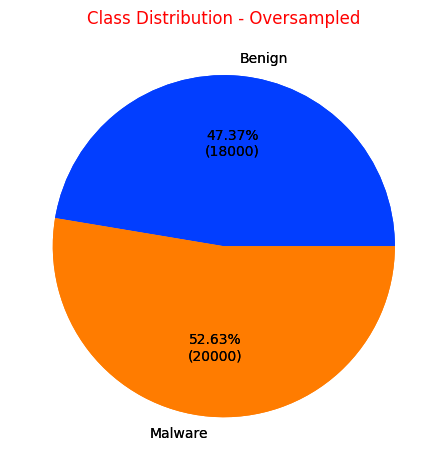

In [ ]:
plot_class_distribution(y_over, oversampled)

In [ ]:
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [ ]:
logistic(X_over_train, X_over_test, y_over_train, y_over_test)

Training Accuracy 0.64
Test Accuracy 0.62
Recall Score 0.65
ROC Score 0.61


LogisticRegression(max_iter=200, n_jobs=-1)

In [ ]:
Naive(X_over_train, X_over_test, y_over_train, y_over_test)

Training Accuracy 0.53
Test Accuracy 0.53
Recall Score 0.98
ROC Score 0.51


GaussianNB()

In [ ]:
reg_over = dtree(X_over_train, X_over_test, y_over_train, y_over_test)
visualize_dtree(reg_over, df_permission.columns[:-1], oversampled)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Training Accuracy 0.54
Test Accuracy 0.54
Recall Score 0.90
ROC Score 0.53


In [ ]:
undersample = RandomUnderSampler(sampling_strategy=0.9)
X_under, y_under = undersample.fit_resample(x, y)

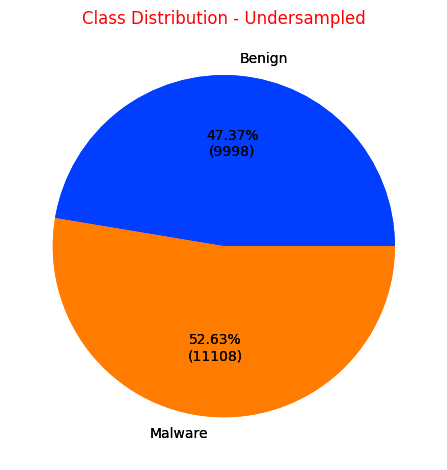

In [ ]:
plot_class_distribution(y_under, undersampled)

In [ ]:
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [ ]:
logistic(X_under_train, X_under_test, y_under_train, y_under_test)

Training Accuracy 0.64
Test Accuracy 0.62
Recall Score 0.65
ROC Score 0.60


LogisticRegression(max_iter=200, n_jobs=-1)

In [ ]:
Naive(X_under_train, X_under_test, y_under_train, y_under_test)

Training Accuracy 0.53
Test Accuracy 0.53
Recall Score 0.98
ROC Score 0.51


GaussianNB()

In [ ]:
reg_under = dtree(X_under_train, X_under_test, y_under_train, y_under_test)
visualize_dtree(reg_under, df_permission.columns[:-1], undersampled)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Training Accuracy 0.61
Test Accuracy 0.60
Recall Score 0.54
ROC Score 0.57


**PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(df_permission)
features = range(pca.n_components_)
PCA_components = pd.DataFrame(principalComponents)
ratios = pca.explained_variance_ratio_*100
PCA_components

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.612592,-0.113919,-0.341604,0.264478,0.857759,0.033131,0.894365,0.872250,-0.206956,-0.016809,...,0.017083,-0.020995,0.022504,-0.006500,-0.022428,-0.011321,0.007850,-0.005211,-0.010749,0.001392
1,0.537263,-0.959392,-0.029070,-0.163764,0.323698,0.395098,-0.157825,0.220064,-0.327654,0.187691,...,-0.003474,0.001155,0.004874,-0.001181,0.000812,-0.006156,-0.004470,-0.002351,0.002414,-0.003314
2,-0.358122,-0.778455,-0.548514,0.176471,-0.047894,-0.134875,0.342867,0.042096,0.057210,0.017441,...,0.000680,-0.000150,0.000490,0.000589,0.000671,-0.000021,-0.000480,-0.000066,-0.000772,-0.000157
3,-1.040884,-0.253041,0.097812,0.724516,0.334791,0.194505,-0.031284,-0.096886,0.074205,0.345226,...,0.000634,-0.000422,0.000892,-0.000251,0.000750,0.000390,-0.000539,-0.000033,-0.000653,0.000260
4,-0.844238,0.216786,-0.003093,-0.138539,-0.138238,0.014237,0.043550,0.046193,-0.017493,-0.413795,...,0.000958,0.000118,0.000652,-0.000541,-0.000165,0.000140,-0.000093,0.000003,-0.000425,-0.000953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,-0.471314,0.821622,-0.374594,0.089226,0.085963,0.102239,0.276633,0.164893,-0.012306,-0.478833,...,0.002448,-0.004624,0.004887,-0.002170,-0.008751,-0.005313,-0.005251,0.007490,0.011935,-0.005424
29995,0.348794,-0.220970,0.500583,-0.631356,0.116301,-0.640473,0.534902,-0.440096,-0.520801,0.092819,...,-0.003398,-0.000942,0.008572,-0.001505,-0.003884,-0.006582,-0.001074,0.002292,0.003660,-0.006464
29996,0.635056,-0.264675,0.269934,-0.659460,-0.189282,0.344642,-0.225867,0.264529,-0.094889,0.457320,...,-0.000928,0.005875,-0.012574,-0.001730,-0.017181,-0.006704,0.002011,-0.000349,0.006582,-0.000229
29997,-0.313022,1.042673,-0.777041,0.172007,0.250594,0.002835,-0.052719,-0.246948,-0.044287,-0.309337,...,-0.000981,-0.000216,0.000714,-0.000906,-0.000990,0.001709,0.000457,0.000390,-0.000432,-0.000108


In [ ]:
def plot_pca(features, ratios) :
    plt.xlabel('PCA features')
    plt.ylabel('variance Percentage')
    plt.xticks(features, rotation=70)
    name = 'PCA features vs Variance Percentage'
    plt.title(name)
    plt.tight_layout()
    plt.bar(features, ratios, color=sns.color_palette("flare"))
    plt.savefig(plots_path + name + '.png', bbox_inches = 'tight')
    plt.show()

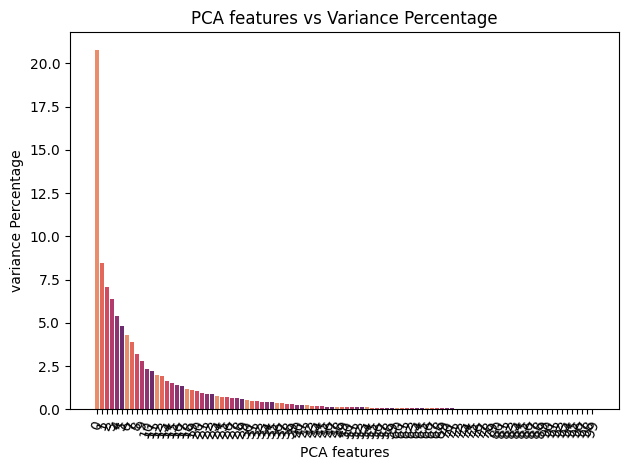

In [ ]:
plot_pca(features, ratios)

In [ ]:
temp_df=pd.DataFrame(pca.inverse_transform(principalComponents))
temp_df

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
0,0.002868,0.000358,3.400966e-16,0.001165,-0.000252,0.003894,-0.000947,-2.862737e-16,0.001758,0.000357,...,0.000376,1.000099,-0.000064,0.001372,-0.000201,-0.004054,0.000003,0.999838,-0.001721,2.049191e-06
1,0.000686,0.000605,2.178713e-16,-0.001850,0.000063,-0.000931,0.000524,-6.050185e-17,0.000692,0.000304,...,-0.000024,-0.000015,-0.000026,-0.000749,0.002241,-0.000560,0.000149,0.000020,0.000871,1.282797e-07
2,0.000220,0.000012,2.597513e-16,0.000205,0.000071,0.000105,-0.000088,-4.014467e-17,0.000268,0.000177,...,0.000006,-0.000001,-0.000003,-0.000121,-0.000108,0.000031,0.000020,0.000005,0.000138,1.474539e-06
3,0.000225,0.000054,2.431771e-16,0.000032,0.000046,0.000054,-0.000063,-2.120435e-18,0.000205,0.000028,...,0.000010,-0.000001,-0.000002,0.000166,-0.000085,0.000024,0.000017,0.000003,-0.000174,1.307066e-06
4,-0.000137,-0.000002,-9.192507e-17,0.000207,0.000013,-0.000037,-0.000027,5.932252e-17,0.000014,0.000037,...,0.000005,-0.000001,-0.000005,0.000009,0.000169,-0.000059,0.000012,0.000005,0.000040,9.999996e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,-0.000383,-0.000243,-2.153320e-16,-0.000572,0.000301,0.001253,-0.000576,2.112361e-16,0.001059,-0.000691,...,-0.000055,-0.000026,0.000029,0.000670,0.001470,0.000843,0.000285,0.000047,-0.000270,1.000010e+00
29995,0.001389,0.000984,1.361214e-16,-0.000208,0.000212,-0.002031,0.000023,-1.916914e-16,0.000060,0.000352,...,0.000030,0.000028,-0.000026,-0.001268,0.003394,-0.001962,0.000065,-0.000045,0.001305,9.999975e-01
29996,-0.001415,0.000512,-1.015597e-16,-0.004660,-0.001181,-0.000652,0.001997,6.789828e-17,-0.000343,-0.001636,...,0.000225,0.000044,-0.000025,-0.000409,0.000293,0.000343,-0.000004,-0.000029,0.000495,9.999951e-01
29997,0.000228,-0.000022,-1.020529e-16,-0.000323,-0.000051,0.000018,-0.000129,5.154376e-17,0.000153,-0.000007,...,0.000002,0.000005,0.000008,-0.000311,-0.000026,-0.000309,0.000030,0.000002,0.000358,9.999991e-01


In [ ]:
temp_df[temp_df<=0]=0
temp_df[temp_df!=0]=1

In [ ]:
temp_df=temp_df.astype(int)
temp_df.index=df['App']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
App,,,,,,,,,,,,,,,,,,,,,
Canada Post Corporation,1,1,1,1,0,1,0,0,1,1,...,1,1,0,1,0,0,1,1,0,1
Word Farm,1,1,1,0,1,0,1,0,1,1,...,0,0,0,0,1,0,1,1,1,1
Fortunes of War FREE,1,1,1,1,1,1,0,0,1,1,...,1,0,0,0,0,1,1,1,1,1
Better Keyboard: Avatar Purple,1,1,1,1,1,1,0,0,1,1,...,1,0,0,1,0,1,1,1,0,1
Boxing Day,0,0,0,1,1,0,0,1,1,1,...,1,0,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beechwood Hotel,0,0,0,0,1,1,0,1,1,0,...,0,0,1,1,1,1,1,1,0,1
ZDefense: Tower Defense,1,1,1,0,1,0,1,0,1,1,...,1,1,0,0,1,0,1,0,1,1
Super Task Killer FREE,0,1,0,0,0,0,1,1,0,0,...,1,1,0,0,1,1,0,0,1,1


In [ ]:
print(df.isnull().sum())

NameError: name 'df' is not defined

In [ ]:
df_y=df['Class']
df_y.index=df['App']

In [ ]:
df_feature=pd.concat([temp_df.iloc[:,:10],df_y],axis=1)
df_feature

,0,1,2,3,4,5,6,7,8,9,Class
App,,,,,,,,,,,
Canada Post Corporation,1,1,1,1,0,1,0,0,1,1,0
Word Farm,1,1,1,0,1,0,1,0,1,1,0
Fortunes of War FREE,1,1,1,1,1,1,0,0,1,1,0
Better Keyboard: Avatar Purple,1,1,1,1,1,1,0,0,1,1,0
Boxing Day,0,0,0,1,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Beechwood Hotel,0,0,0,0,1,1,0,1,1,0,1
ZDefense: Tower Defense,1,1,1,0,1,0,1,0,1,1,1
Super Task Killer FREE,0,1,0,0,0,0,1,1,0,0,1


In [ ]:
X_feature=df_feature.iloc[:,:-1]
y_feature=df_feature.iloc[:,-1]

In [ ]:
X_feature_train, X_feature_test, y_feature_train, y_feature_test = train_test_split(X_feature, y_feature, test_size=0.2, random_state=42)
X_feature_train.shape,X_feature_test.shape,y_feature_train.shape,y_feature_test.shape

((23999, 10), (6000, 10), (23999,), (6000,))

In [ ]:
logistic(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Accuracy 0.97
Test Accuracy 0.97
Recall Score 0.94
ROC Score 0.95


LogisticRegression(max_iter=200, n_jobs=-1)

In [ ]:
Naive(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Accuracy 0.99
Test Accuracy 0.99
Recall Score 0.91
ROC Score 0.95


GaussianNB()

In [ ]:
reg_feature = dtree(X_feature_train, X_feature_test, y_feature_train, y_feature_test)
visualize_dtree(reg_feature, df_feature.columns[:-1], unsampled, 'pca_dt')

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Training Accuracy 0.97
Test Accuracy 0.97
Recall Score 0.95
ROC Score 0.94


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def randomforest(X_train, X_test, y_train, y_test) :
    reg = RandomForestClassifier(n_estimators=200, n_jobs = -1).fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

In [ ]:
randomforest(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Accuracy 0.97
Test Accuracy 0.97
Recall Score 0.96
ROC Score 0.95


RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [ ]:
import xgboost as xgb

In [ ]:
def xgboost(X_train, X_test, y_train, y_test) :
    reg = GridSearchCV(estimator = xgb.XGBClassifier(scale_pos_weight = 0.5, n_jobs = -1), param_grid={}, cv = 10)
    reg = reg.fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

In [ ]:
xgboost(X_train, X_test, y_train, y_test)

Training Accuracy 0.80
Test Accuracy 0.77
Recall Score 0.64
ROC Score 0.63


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={})

In [ ]:
xgboost(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Accuracy 0.98
Test Accuracy 0.98
Recall Score 0.94
ROC Score 0.96


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={})

In [ ]:
from sklearn import svm

In [ ]:
def svm_classfier(X_train, X_test, y_train, y_test) :
    reg = svm.SVC().fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

In [ ]:
svm_classfier(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Accuracy 0.97
Test Accuracy 0.97
Recall Score 0.95
ROC Score 0.95


SVC()

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
def mlp(X_train, X_test, y_train, y_test) :
    reg = MLPClassifier(random_state = 42, max_iter = 300).fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

In [ ]:
mlp(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Accuracy 0.96
Test Accuracy 0.96
Recall Score 0.97
ROC Score 0.95


MLPClassifier(max_iter=300, random_state=42)